# **Title of Project**

Objective:

# Predict whether a point represents a hill (1) or a valley (0) based on its features.

Data Source:

# The dataset is obtained from Kaggle: "Hill Valley Dataset", Link: https://www.kaggle.com/datasets/abhijitashokpatere/hill-valley-dataset

# Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [2]:
data = pd.read_csv('Hill Valley Dataset.csv')

# Describe Data

In [12]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


# Data Exploration

In [11]:
print(data.head())
print(data.info())


         V1        V2        V3        V4        V5        V6        V7  \
0     39.02     36.49     38.20     38.85     39.38     39.74     37.02   
1      1.83      1.71      1.77      1.77      1.68      1.78      1.80   
2  68177.69  66138.42  72981.88  74304.33  67549.66  69367.34  69169.41   
3  44889.06  39191.86  40728.46  38576.36  45876.06  47034.00  46611.43   
4      5.70      5.40      5.28      5.38      5.27      5.61      6.00   

         V8        V9       V10  ...       V92       V93       V94       V95  \
0     39.53     38.81     38.79  ...     36.62     36.92     38.80     38.52   
1      1.70      1.75      1.78  ...      1.80      1.79      1.77      1.74   
2  73268.61  74465.84  72503.37  ...  73438.88  71053.35  71112.62  74916.48   
3  37668.32  40980.89  38466.15  ...  42625.67  40684.20  46960.73  44546.80   
4      5.38      5.34      5.87  ...      5.17      5.67      5.60      5.94   

        V96       V97       V98       V99      V100  Class  
0     3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


# Define Target Variable (y) and Feature Variables (X)

In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

# Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling - Logistic Regression

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Modeling - Logistic Regression

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.9629629629629629
Confusion Matrix:
 [[106   4]
 [  5 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       110
           1       0.97      0.96      0.97       133

    accuracy                           0.96       243
   macro avg       0.96      0.96      0.96       243
weighted avg       0.96      0.96      0.96       243



# Visualizing Accuracy with Pie Chart

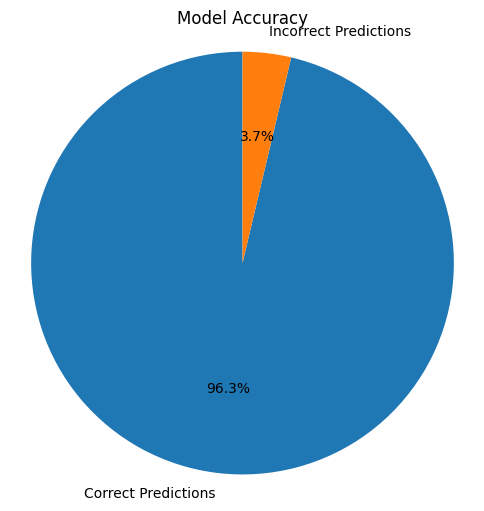

In [13]:
plt.figure(figsize=(6, 6))
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [accuracy, 1 - accuracy]
colors = ['#66b3ff', '#ff9999']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Model Accuracy')
plt.axis('equal')
plt.show()

# Prediction

In [9]:
new_points1 = [[39.02,36.49,38.2,38.85,39.38,39.74,37.02,39.53,38.81,38.79,37.65,39.34,38.55,39.03,37.21,36.32,37.81,38.95,36.7,39.72,37.06,37.29,36.43,36.53,36.19,38.17,37.3,36.15,36.68,36.7,36.68,36.99,38.92,37.25,37.47,36.32,35.75,35.68,34.66,34.26,35.62,36.6,34.78,34.67,34.3,33.4,31.4,31.75,31.75,32.84,33.76,35.74,34.01,33.91,36.88,34.41,35.52,36.94,36.95,35.57,38.02,37.32,39.05,37.97,37.01,38.98,38.83,38.87,38.03,38.4,38.25,38.61,36.23,37.81,37.98,38.58,38.96,38.97,39.08,38.79,38.79,36.31,36.59,38.19,37.95,39.63,39.27,37.19,37.13,37.47,37.57,36.62,36.92,38.8,38.52,38.07,36.73,39.46,37.5,39.1]]
new_points2 = [[1.83,1.71,1.77,1.77,1.68,1.78,1.8,1.7,1.75,1.78,1.86,1.76,1.81,1.86,1.74,1.78,1.81,2.02,2,2.01,2,2.06,2,1.93,1.88,1.85,1.89,1.83,1.76,1.83,1.81,1.81,1.78,1.85,1.86,1.73,1.79,1.81,1.85,1.71,1.71,1.71,1.84,1.76,1.73,1.83,1.68,1.73,1.76,1.77,1.72,1.75,1.66,1.76,1.77,1.78,1.63,1.72,1.66,1.67,1.74,1.65,1.74,1.79,1.69,1.76,1.74,1.82,1.78,1.65,1.65,1.82,1.71,1.83,1.72,1.63,1.77,1.69,1.81,1.74,1.7,1.72,1.74,1.72,1.74,1.71,1.7,1.83,1.79,1.78,1.71,1.8,1.79,1.77,1.74,1.74,1.8,1.78,1.75,1.69]]

prediction = model.predict(new_points1)
if prediction[0] == 1:
    print("Prediction 1: Hill")
else:
    print("Prediction 1: Valley")

prediction = model.predict(new_points2)
if prediction[0] == 1:
    print("Prediction 2: Hill")
else:
    print("Prediction 2: Valley")

Prediction 1: Valley
Prediction 2: Hill


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
